# Exploratory Analysis and Logistic Regression on Bank Data

In [422]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,classification_report
import statsmodels.api as sms

In [433]:
def specificity(true_negative,false_positive):
    sp=true_negative/(true_negative+false_positive)
    return sp

In [4]:
#1.Import ‘bank.csv’ dataset

In [5]:
bank=pd.read_excel(r"C:\Users\1sach\OneDrive\Desktop\Assignment\Logistic Regression Analysis\bank.xlsx")

In [6]:
bank.head()

,age,job,marital,education,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign,subscribed
0,30,unemployed,married,primary,no,1787,no,no,1,0,no
1,33,services,married,secondary,no,4789,yes,yes,1,4,no
2,35,management,single,tertiary,no,1350,yes,no,1,1,no
3,30,management,married,tertiary,no,1476,yes,yes,4,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,1,0,no


In [14]:
#2.Perform relevant data cleaning

In [7]:
bank.isnull().sum()

age                  0
job                  0
marital              0
education            0
default              0
balance              0
housing-loan         0
personal-loan        0
current-campaign     0
previous-campaign    0
subscribed           0
dtype: int64

In [8]:
bank.dtypes

age                   int64
job                  object
marital              object
education            object
default              object
balance               int64
housing-loan         object
personal-loan        object
current-campaign      int64
previous-campaign     int64
subscribed           object
dtype: object

In [9]:
#3.Perform Exploratory data analysis (Descriptive and visualization)

In [10]:
bank.head()

,age,job,marital,education,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign,subscribed
0,30,unemployed,married,primary,no,1787,no,no,1,0,no
1,33,services,married,secondary,no,4789,yes,yes,1,4,no
2,35,management,single,tertiary,no,1350,yes,no,1,1,no
3,30,management,married,tertiary,no,1476,yes,yes,4,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,1,0,no


In [56]:
byjob=(bank.groupby(['job','subscribed']).size().unstack(fill_value=0)).sort_values(by='yes',ascending=False)

In [57]:
byjob.head()

subscribed,no,yes
job,,
management,838,131
technician,685,83
blue-collar,877,69
admin.,420,58
retired,176,54


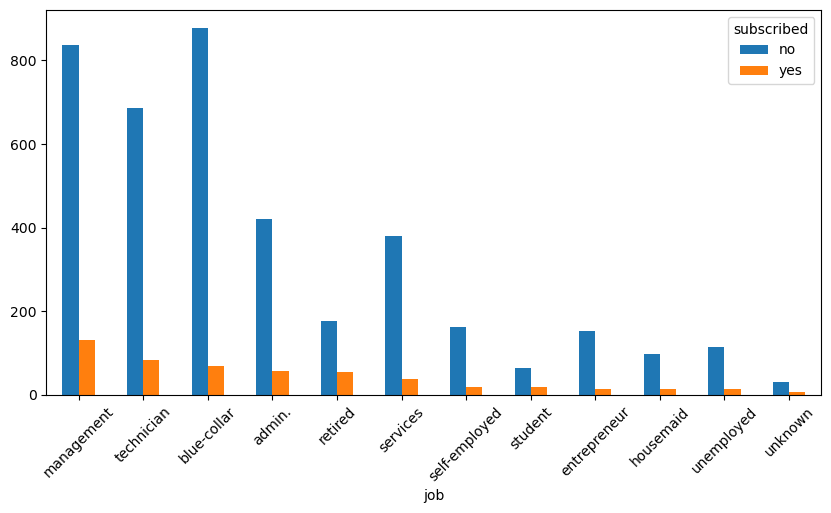

In [437]:

byjob.plot(kind='bar',figsize=(10,5))
plt.xticks(rotation=45)
plt.tight_layout
plt.show()

Top 5 Subscribing Employement Status Are:
1) Management,
2) Technician,
3) Blue-Collar,
4) Admin,
5) Retired.

In [60]:
bank.head()

,age,job,marital,education,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign,subscribed
0,30,unemployed,married,primary,no,1787,no,no,1,0,no
1,33,services,married,secondary,no,4789,yes,yes,1,4,no
2,35,management,single,tertiary,no,1350,yes,no,1,1,no
3,30,management,married,tertiary,no,1476,yes,yes,4,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,1,0,no


In [178]:
sub_yes=bank[bank['subscribed']=='yes']

In [179]:
sub_yes.head()

,age,job,marital,education,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign,subscribed
13,20,student,single,secondary,no,502,no,no,1,0,yes
30,68,retired,divorced,secondary,no,4189,no,no,2,0,yes
33,32,management,single,tertiary,no,2536,yes,no,6,0,yes
34,49,technician,married,tertiary,no,1235,no,no,3,0,yes
36,78,retired,divorced,primary,no,229,no,no,1,0,yes


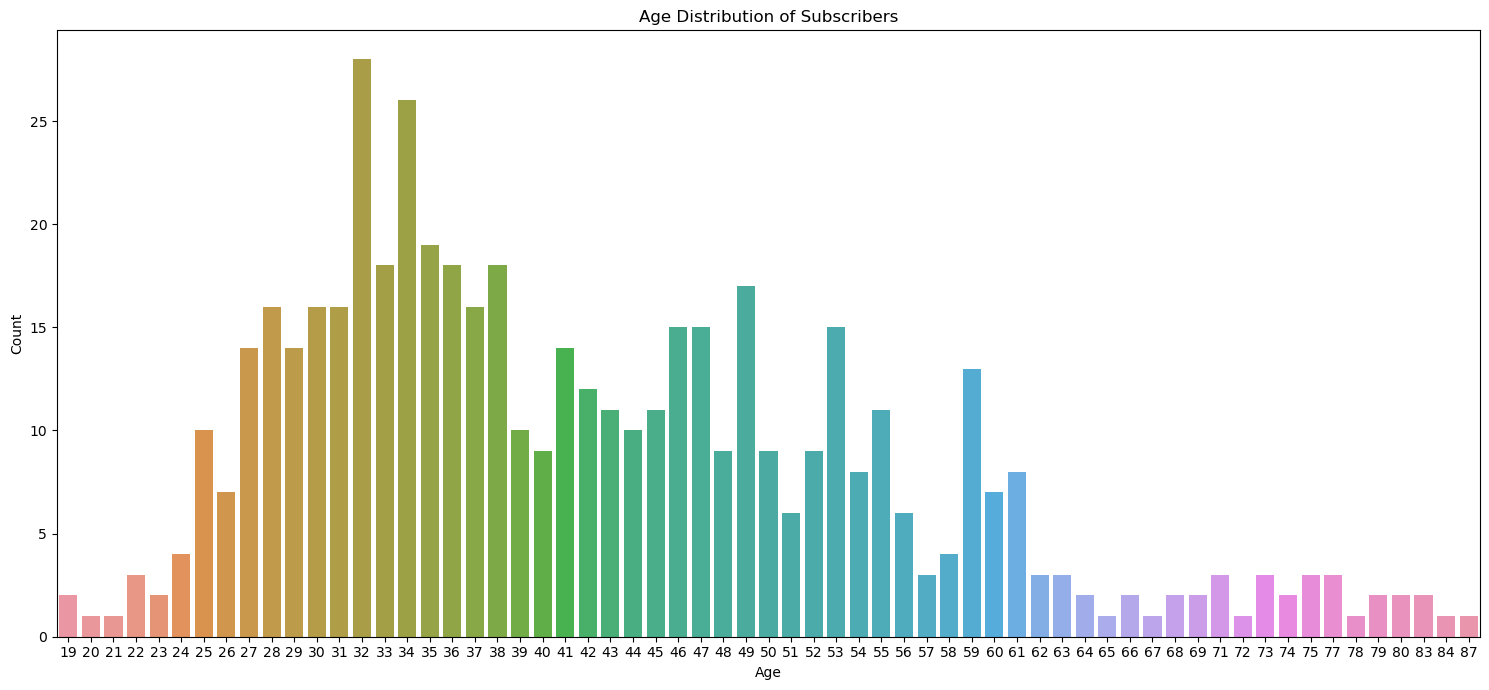

In [180]:
plt.figure(figsize=(15,7))
sns.countplot(data=sub_yes,x='age')
plt.title('Age Distribution of Subscribers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


1)The above graph of subscribers by age suggests that the maximum count of our subscribers are middle aged as between 25-40

2)A sudden increase has been oberserved after age 25 with a peak at 32 and and still keeps flowing till 50s

In [112]:
bank.head()

,age,job,marital,education,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign,subscribed
0,30,unemployed,married,primary,no,1787,no,no,1,0,no
1,33,services,married,secondary,no,4789,yes,yes,1,4,no
2,35,management,single,tertiary,no,1350,yes,no,1,1,no
3,30,management,married,tertiary,no,1476,yes,yes,4,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,1,0,no


<function matplotlib.pyplot.xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

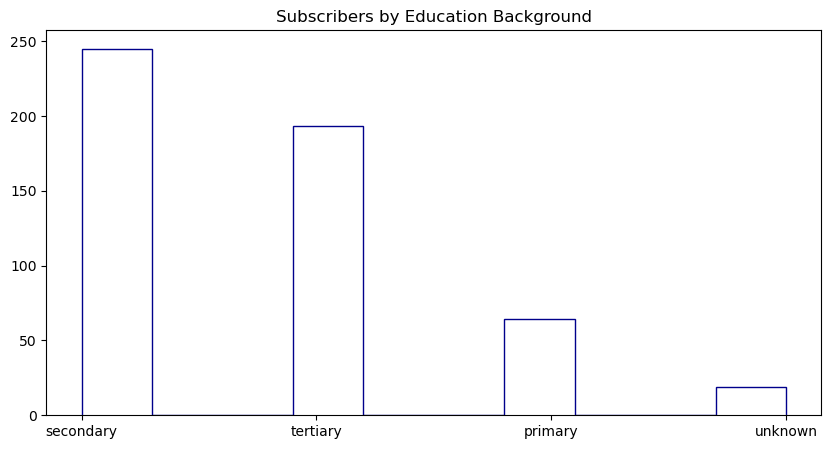

In [181]:
plt.figure(figsize=(10,5))
plt.hist(sub_yes['education'],histtype='step',color='darkblue',)
plt.title('Subscribers by Education Background')
plt.xlabel

Majority of the subcribers have attained atleast secondary education, followed by second majority of tertiary education level.

In [183]:
(sub_yes.describe()).astype(int)

,age,balance,current-campaign,previous-campaign
count,521,521,521,521
mean,42,1571,2,1
std,13,2444,2,2
min,19,-1206,1,0
25%,32,171,1,0
50%,40,710,2,0
75%,50,2160,3,2
max,87,26965,24,14


 Average age of people subcribing is 42 as also explored that middle aged people are more likely to subscribe.

In [189]:
marital_sub=pd.crosstab(bank['marital'],bank['subscribed'])

In [194]:
marital_sub

subscribed,no,yes
marital,,
divorced,451,77
married,2520,277
single,1029,167


<Axes: xlabel='subscribed', ylabel='marital'>

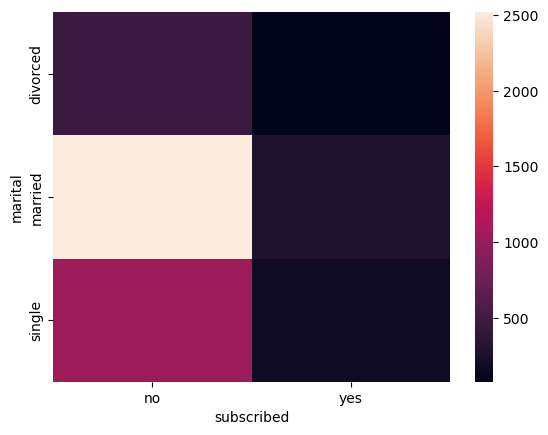

In [193]:
sns.heatmap(marital_sub,cbar='viridis')

In [221]:
loan_sub=bank.groupby(['housing-loan','personal-loan','subscribed']).size().unstack()


<Axes: xlabel='subscribed', ylabel='housing-loan-personal-loan'>

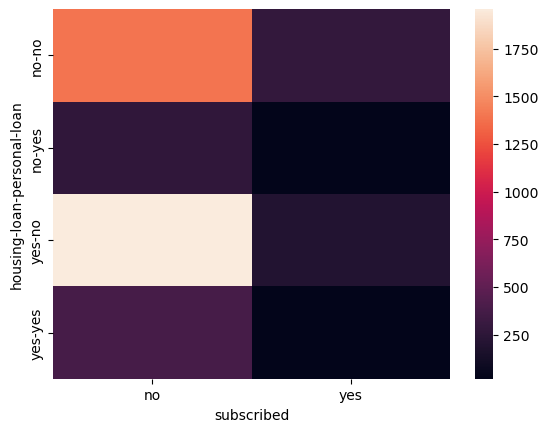

In [222]:
sns.heatmap(loan_sub)

In [223]:
#4.	Consider a subset of ‘bank’ data with variables as ‘age’, ‘marital’, ‘education’, 
#‘default’, ‘balance’, ‘housing-loan’, ‘personal-loan’, and ‘subscribed’. Name this new data as bank_new

In [224]:
bank_new=bank[['age','marital','education','default','balance','housing-loan','personal-loan','subscribed']]

In [225]:
bank_new.head()

,age,marital,education,default,balance,housing-loan,personal-loan,subscribed
0,30,married,primary,no,1787,no,no,no
1,33,married,secondary,no,4789,yes,yes,no
2,35,single,tertiary,no,1350,yes,no,no
3,30,married,tertiary,no,1476,yes,yes,no
4,59,married,secondary,no,0,yes,no,no


In [226]:
#5.	Identify categorical and continuous variables.

Only age and balance are continous variables whereas all others are categorical variables

In [227]:
#6.Divide the dataset into training and testing

In [283]:
bank_new.head()

,age,marital,education,default,balance,housing-loan,personal-loan,subscribed
0,30,married,primary,no,1787,no,no,no
1,33,married,secondary,no,4789,yes,yes,no
2,35,single,tertiary,no,1350,yes,no,no
3,30,married,tertiary,no,1476,yes,yes,no
4,59,married,secondary,no,0,yes,no,no


As we see, there are multiple categorical variables which we have to convert into binary in order to perform logistic regression

* Converting the categorical variables into boolean

In [284]:
bank_new=pd.get_dummies(bank_new, drop_first=True)

* Converting Boolean into binary

In [285]:
bank_new=bank_new.astype(int)

In [286]:
bank_new.head()


,age,balance,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing-loan_yes,personal-loan_yes,subscribed_yes
0,30,1787,1,0,0,0,0,0,0,0,0
1,33,4789,1,0,1,0,0,0,1,1,0
2,35,1350,0,1,0,1,0,0,1,0,0
3,30,1476,1,0,0,1,0,0,1,1,0
4,59,0,1,0,1,0,0,0,1,0,0


Spliting The Data

In [287]:
x=bank_new.iloc[:,:-1]

In [288]:
y=bank_new.iloc[:,-1]

In [289]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=2)

In [290]:
#7.For ‘bank_new’ dataset, develop a Logistic Regression model to predict the variable
#‘subscribed’ with the help of other variables

In [291]:
x_train=sms.add_constant(x_train)
x_test=sms.add_constant(x_test)

In [296]:
model=LogisticRegression()

In [297]:
model.fit(x_train,y_train)

LogisticRegression()

In [369]:
#8.Determine the predicted value of y (subscribed)

## Predicting the test values


In [298]:
y_pred=model.predict(x_test)

In [337]:
y_pred_series=pd.Series(y_pred)

In [351]:
pred=y_pred.reshape(len(y_pred),1)

In [353]:
y_tst=(y_test.to_numpy()).reshape(len(y_test),1)

In [366]:
np.concatenate((pred,y_tst),1)

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]])

## Making The Confusion Matrix


In [367]:
cm=confusion_matrix(y_test,y_pred)

In [368]:
cm

array([[814,   0],
       [ 91,   0]], dtype=int64)

In [370]:
#9.	Determine the following:
#Accuracy
#Precision
#Recall
#Sensitivity
#Specificity
#F1 score  
#AUC (Area under ROC curve)


In [436]:
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy : {accuracy:.2f}")
precision=precision_score(y_test,y_pred)
print(f"Precision : {precision:.2f}")
recall=recall_score(y_test,y_pred)
print(f"Recall :{recall:.2f}")
f1=f1_score(y_test,y_pred)
print(f"F1 Score: {f1:.2f}")
auc=roc_auc_score(y_test,y_pred)
print(f"ROC AUC Score:{auc:.2f}")
print(classification_report(y_test,y_pred))


Accuracy : 0.90
Precision : 0.00
Recall :0.00
F1 Score: 0.00
ROC AUC Score:0.50
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       814
           1       0.00      0.00      0.00        91

    accuracy                           0.90       905
   macro avg       0.45      0.50      0.47       905
weighted avg       0.81      0.90      0.85       905



C:\Users\1sach\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\1sach\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\1sach\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\1sach\anaconda3\Lib\site-packages\sklearn\metrics\_classification.p

The overall accuracy is quite good.

Precision of 0 indicating that our model failed to identify any True Positive Prediction against all positive predicted


Recall of 0 indicating that our model failed to indentify any True Positive against all the actual True Positives

F1 Score is deemed to be 0 as it is calculated on the bases of Recall & Precision

As per the above classificaion Report, Our model is good to predict the non subscribers as it is performing well on the bases of the results. but in terms of predicting subscribed customers, it is failed.

* Calculating Specificity

In [429]:
cm

array([[814,   0],
       [ 91,   0]], dtype=int64)

In [431]:
TN=cm[0,0]

In [432]:
FP=cm[0,1]

In [434]:
specificity(TN,FP)

1.0

The Specificity of 1 indicating how our model perfectly working for predicting non subscribing customers

# Conclusion :

###### This model shall be perfectly predicting non subscribing customers but it is failed to predict those customers who are going to subscribe.